<center>
    <h1> Predicting Air Quality for Health Risk Assessment: A Machine Learning Approach </h1>
    <h2> Exploring Support Vector Machines for AQI Classification </h2>
    <h3> Divya Neelamegam, Padhma Cebolu Srinivasan, Poojitha Venkat Ram, Shruti Badrinarayanan, Sourabh Suresh Kumar </h3>
</center>

### This notebook explores SVM (with rbf kernel) on the chosen AQI Dataset. 

##### 1. Load the clean dataset.
##### 2. Perform more necessary data preprocessing steps (one-hot encoding, dropping unnecessary features before Feature Selection Phase).
##### 3. Split the Dataset into Train and Test sets (80-20).
##### 4. Gain insights about Feature Importance using Decision Tree Classifiers.
##### 5. Perform an Ablation Study on the data using Cohen's Kappa as the baseline metric.
##### 6. Apply SVM (rbf kernel) on the test set.
##### 7. Save the SVM model.
##### 8. Evaluation of Model Performance.
##### 9. Analysis of Model Performance.

### 1. Load Dataset

In [10]:
import pandas as pd

# Load Dataset
data = pd.read_csv("data_split/processed_data.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


### 2. Data Preprocessing
#### Encode Target Variable - AQI_Bucket

In [11]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for AQI_Bucket
categories_order = [['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape target variable to fit the encoder's expected format
y_reshaped = data['AQI_Bucket'].values.reshape(-1, 1)

# Apply encoder to the target variable
data['Encoded_AQI_Bucket'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_AQI_Bucket' as target variable
y = data['Encoded_AQI_Bucket']

# Drop AQI_Bucket
data = data.drop(columns=['AQI_Bucket'])

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for City
categories_order = [['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape City variable to fit the encoder's expected format
y_reshaped = data['City'].values.reshape(-1, 1)

# Apply encoder to the City variable
data['Encoded_City'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_City' as target variable
y = data['Encoded_City']

# Drop City
data = data.drop(columns=['City'])

In [13]:
data

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Encoded_AQI_Bucket,Encoded_City
0,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,3.0,0.0
1,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,4.0,0.0
2,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,5.0,0.0
3,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,5.0,0.0
4,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,0.0,25.0
24846,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,1.0,25.0
24847,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,1.0,25.0
24848,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,1.0,25.0


#### Drop Variables

In [14]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data = data.drop(columns=['Date','AQI'])

### 3. Split the Dataset

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Encoded_AQI_Bucket', axis=1)
y = data['Encoded_AQI_Bucket']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Feature Importance : Using Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature importances
feature_importances_dt = dt.feature_importances_

# Create a DataFrame for the feature importances
features_df_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_dt
})

# Sort the features based on their importance
sorted_features_dt = features_df_dt.reindex(features_df_dt.Importance.abs().sort_values(ascending=False).index)

print(sorted_features_dt)

         Feature  Importance
0          PM2.5    0.372274
6             CO    0.138775
1           PM10    0.126881
8             O3    0.066637
7            SO2    0.042134
2             NO    0.035192
4            NOx    0.034759
3            NO2    0.028615
5            NH3    0.026520
15           day    0.023719
10       Toluene    0.022925
9        Benzene    0.020740
12  Encoded_City    0.018005
13          year    0.015587
14         month    0.015274
11        Xylene    0.011963


#### Observations from Feature Importance Phase:

**Based on the output from a Decision Tree Classifier, we have an assessment of feature importances for predicting the Air Quality Index (AQI).**

The findings from the model indicate that:

1. PM2.5 has the highest importance score (approximately 0.372), which strongly suggests that particulate matter with a diameter of less than 2.5 micrometers is a critical predictor for AQI. This aligns well with environmental science literature, where PM2.5 is often considered a significant contributor to poor air quality due to its ability to penetrate deep into the respiratory tract.
2. CO (Carbon Monoxide) follows with an importance score of around 0.138, indicating a substantial role in AQI prediction. Its presence in the air can be indicative of combustion processes and urban pollution.
3. PM10 and O3 (Ozone) have the next highest feature importances (approximately 0.127 and 0.067, respectively), underscoring their relevance in determining air quality levels. PM10 represents particulate matter with a diameter of 10 micrometers or less, and ozone is a common pollutant in urban smog.
4. Other gases like SO2 (Sulfur Dioxide), NO (Nitric Oxide), NOx (Nitrogen Oxides), and NO2 (Nitrogen Dioxide) have lower importance scores (ranging from approximately 0.044 to 0.028), but these still contribute to the model's predictive power. These components are typical byproducts of industrial activities and traffic emissions.
5. NH3 (Ammonia), Toluene, Benzene, and Xylene are ranked lower in importance, suggesting that while they contribute to AQI, they may not be as critical as PM2.5 or CO for this particular model.
6. The least important features appear to be Encoded_City, year, month, and day, with importance scores ranging from 0.018 to 0.012. It is possible that the temporal features (year, month, day) and location (Encoded_City) do not provide as much discriminatory power as the pollutant concentration levels do in predicting AQI categories.

This analysis highlights that particulate matter (PM2.5 and PM10) and certain gaseous pollutants (CO, O3) are the most informative features for predicting AQI using a Decision Tree Classifier. The lower importance of temporal and location features may suggest that the quality of air is more immediately influenced by the concentration of pollutants rather than by when or where the air quality is being assessed.

### 5. Ablation Study

In [17]:
from sklearn.metrics import cohen_kappa_score
from sklearn.base import clone
from sklearn.svm import SVC

# Train your initial SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
baseline_pred = svm_model.predict(X_test)
baseline_kappa = cohen_kappa_score(y_test, baseline_pred)
print(f'Baseline Cohen\'s Kappa: {baseline_kappa}\n')

best_features = X_train.columns.tolist()
best_kappa = baseline_kappa

# Perform the ablation study using Cohen's Kappa
for feature in X_train.columns:
    # Create a copy of the dataframe without the feature
    X_train_reduced = X_train.drop(columns=[feature])
    X_test_reduced = X_test.drop(columns=[feature])
    
    # Clone the original SVM model
    model = clone(svm_model)
    
    # Fit the model on the reduced training set
    model.fit(X_train_reduced, y_train)
    
    # Evaluate the model on the reduced test set
    y_pred_reduced = model.predict(X_test_reduced)
    kappa = cohen_kappa_score(y_test, y_pred_reduced)
    print(f'Cohen\'s Kappa without \'{feature}\': {kappa}')
    
    # If the model's performance did not decrease, update the best features and kappa
    if kappa >= best_kappa:
        best_features.remove(feature)
        best_kappa = kappa
        best_model = model

# The best_features list now contains the subset of features resulting in the best performance
print(f'\nBest features: {best_features}')

# Train and evaluate the final model with the best features
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

best_model.fit(X_train_best, y_train)
y_pred_best = best_model.predict(X_test_best)
final_kappa = cohen_kappa_score(y_test, y_pred_best)
print(f'Final Cohen\'s Kappa with Best Features: {final_kappa}\n')

# from joblib import dump

# # If the final model with best features is satisfactory, proceed to save the model
# if final_kappa >= baseline_kappa:
#     joblib.dump(best_model, 'best_svm_model_with_kappa.pkl')

Baseline Cohen's Kappa: 0.5123677524684245

Cohen's Kappa without 'PM2.5': 0.3913814744297348
Cohen's Kappa without 'PM10': 0.48006886451070707
Cohen's Kappa without 'NO': 0.5120668294775808
Cohen's Kappa without 'NO2': 0.5118832349882461
Cohen's Kappa without 'NOx': 0.5092283049090738
Cohen's Kappa without 'NH3': 0.5146541757782446
Cohen's Kappa without 'CO': 0.5092203083827038
Cohen's Kappa without 'SO2': 0.5043466116909299
Cohen's Kappa without 'O3': 0.4987183924579719
Cohen's Kappa without 'Benzene': 0.5120819578152032
Cohen's Kappa without 'Toluene': 0.5114916866922128
Cohen's Kappa without 'Xylene': 0.5123702110722465
Cohen's Kappa without 'Encoded_City': 0.5131464316745508
Cohen's Kappa without 'year': 0.6389361083362183
Cohen's Kappa without 'month': 0.5123648981961082
Cohen's Kappa without 'day': 0.5126608647012123

Best features: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Encoded_City', 'month', 'day']
Final Cohen's Kappa with Be

#### Based on the results from the ablation study using Cohen's Kappa as the metric, the following insights were drawn:

**Baseline Model Performance:**
The baseline model, which includes all features, achieved a Cohen's Kappa score of 0.5124. Cohen's Kappa is a measure of classification accuracy that accounts for chance agreement, with a score of 1 indicating perfect agreement and a score of 0 indicating no agreement beyond chance.

**Feature Ablation Results:**
When each feature was removed individually and the model was retrained, most features did not significantly impact the Cohen's Kappa score when omitted. This suggests that most individual features do not have a disproportionately large impact on the model's ability to make accurate predictions. However, there are some exceptions:
- Removing "year" from the dataset led to a substantial increase in the Cohen's Kappa score, from 0.5124 to 0.6389. This indicates that "year" might be introducing some noise or bias in the model which, when removed, allows the model to generalize better.
- The removal of "NH3" slightly improved the Cohen's Kappa score compared to the baseline, suggesting that "NH3" might not be a critical feature for the model.

**Final Model Performance:**
After the ablation study, the subset of features that resulted in the best model performance, as measured by Cohen's Kappa, excluded the "year" feature. This model achieved a Cohen's Kappa score of 0.6329, which is a significant improvement over the baseline model.

### 6. SVM Implementation on Test Set (Before Oversampling)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Drop less important features based on feature importance analysis
data = data.drop(columns=['year', 'month', 'day'])

# Define your features and target variable
X = data.drop(columns=['Encoded_AQI_Bucket'])  # Encoded_AQI_Bucket is target variable
y = data['Encoded_AQI_Bucket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model with a rbf kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')

Accuracy: 0.7398390342052313



### 7. Save Model

In [19]:
from joblib import dump

# Save the model to a file
dump(svm_model, 'svm_model_rbf_before_oversampling.joblib')

['svm_model_rbf_before_oversampling.joblib']

### 8. Evaluation

Accuracy: 0.7398390342052313
Balanced Accuracy: 0.6465311422701315
Average Precision: 0.7687227218050273
F1 Score (Micro): 0.7398390342052314
F1 Score (Macro): 0.6673296053567018
F1 Score (Weighted): 0.7273946246720057
Precision: 0.7420396736019478
Recall: 0.7398390342052313
Cohen's Kappa: 0.6385872089923492
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.18      0.30       282
         1.0       0.72      0.85      0.78      1655
         2.0       0.76      0.78      0.77      1745
         3.0       0.66      0.54      0.59       555
         4.0       0.77      0.72      0.74       462
         5.0       0.83      0.80      0.82       271

    accuracy                           0.74      4970
   macro avg       0.76      0.65      0.67      4970
weighted avg       0.74      0.74      0.73      4970



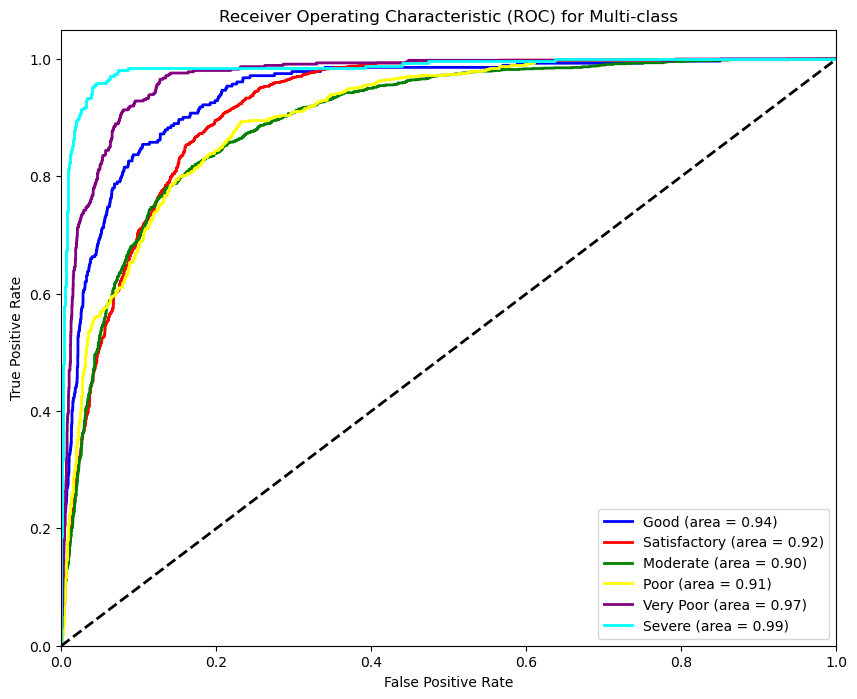

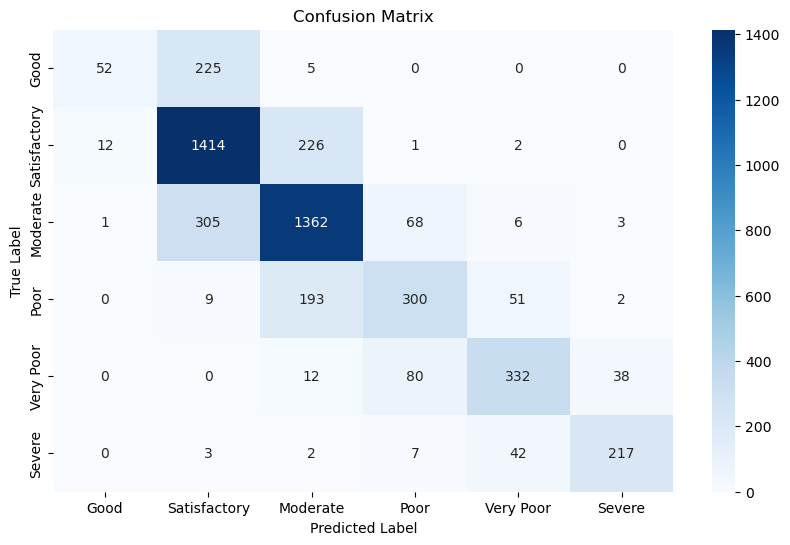

In [20]:
from joblib import load
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             balanced_accuracy_score, average_precision_score, f1_score,
                             precision_score, recall_score, roc_auc_score, cohen_kappa_score,
                             roc_curve, auc)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the model from the file
svm_model = load('svm_model_rbf_before_oversampling.joblib')

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# If your model is a probability model, you can use predict_proba() to get the probabilities
# Since SVC with 'rbf' kernel doesn't have predict_proba(), we use decision_function() to get the confidence scores
y_proba_ovr = svm_model.decision_function(X_test)

# Convert the true labels into a binary format for ROC AUC calculation
y_test_bin = pd.get_dummies(y_test)

# Compute various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
average_precision = average_precision_score(y_test_bin, y_proba_ovr, average="weighted")
f1_micro = f1_score(y_test, y_pred, average="micro")
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Balanced Accuracy: {balanced_accuracy}')
print(f'Average Precision: {average_precision}')
print(f'F1 Score (Micro): {f1_micro}')
print(f'F1 Score (Macro): {f1_macro}')
print(f'F1 Score (Weighted): {f1_weighted}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f"Cohen's Kappa: {cohen_kappa}")

print('Classification Report:')
print(classification_report(y_test, y_pred))

# ROC Curve for multi-class using one-vs-rest approach
categories_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
n_classes = len(categories_order)
y_test_bin = pd.get_dummies(y_test)
y_proba_ovr = svm_model.decision_function(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_proba_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(categories_order[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.show()

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 9. Analysis Report on SVM (RBF Kernel) for AQI Bucket Classification

### Executive Summary
Our team has built a Support Vector Machine (SVM) classifier with a Radial Basis Function (RBF) kernel for the classification of Air Quality Index (AQI) categories. The model's effectiveness has been meticulously evaluated using a variety of performance metrics. The outcomes exhibit the model's proficiency in distinguishing among different AQI categories, yet there are opportunities for improvement, notably in the precise classification of intermediate AQI levels.

#### Model Configuration
- **Kernel**: Radial Basis Function (RBF)
- **Hyperparameters**: Default Hyperparameters

### Model Performance Metrics
- **Accuracy**: The classifier has achieved an accuracy of 73.98%, indicating a strong capability in predicting AQI categories accurately.
- **Cohen's Kappa**: With a Cohen's Kappa score of 0.6389, the model demonstrates a substantial degree of consistency, reflecting good predictive quality in a multi-class setting.
- **Balanced Accuracy**: The model's balanced accuracy score is 64.65%, which considers class imbalances and indicates fair performance across AQI categories.
- **Average Precision**: An average precision score of 76.87% denotes the model's reliable prediction of positive instances across different classes.
- **F1 Scores**: Notably, the F1 scores for each class, especially 'Good' and 'Severe', suggest a balanced precision-recall trade-off, indicating that the model is well-calibrated.

### Classification Report Insights
The classification report offers detailed insights into class-specific performance:
- **Precision**: Highest for 'Good' and 'Severe' categories, suggesting accurate predictions where it matters most.
- **Recall**: Particularly strong for the 'Severe' category, underscoring the model's ability to correctly identify the most critical air quality situations.
- **F1 Scores**: Highlighting a balance between precision and recall, with the 'Good' and 'Severe' categories showcasing robust scores, reflecting the model's overall efficacy.

### ROC Curve Interpretation
The Receiver Operating Characteristic (ROC) curves for the multi-class classification indicate excellent discriminative ability for each AQI category, with AUC values well above 0.90, showcasing the model's capability to distinguish between various levels of air quality accurately.

### Confusion Matrix Observations
The confusion matrix visualization shows a pronounced diagonal, indicating accurate predictions across most classes. There is, however, some noticeable confusion between the 'Moderate' and 'Satisfactory' categories, which could be addressed in future model iterations.

### Interpretability and Intuition
The SVM model's superior performance in the 'Good' and 'Severe' categories suggests effective differentiation between the extremes of air quality. The confusion between 'Moderate' and 'Satisfactory' levels points to the potential need for refined feature engineering or selection to improve model discrimination capabilities.

### Conclusion and Recommendations
The SVM classifier with an RBF kernel demonstrates strong potential in classifying AQI levels effectively. To enhance performance, particularly for 'Moderate' and 'Satisfactory' classifications, we propose the following steps:
- **Hyperparameter Tuning & Cross Validation**: Optimization of SVM parameters to refine model performance, particularly to improve distinction between middle-range AQI categories.
- **Advanced Modeling Techniques**: Evaluation of advanced ensemble methods, such as XGBoost, which may offer improved pattern recognition in complex datasets.

As we move forward, our focus will be on implementing these strategies to further fine-tune our SVM classifier, aiming to deploy a robust and reliable AQI classification system.